# Лабораторная работа №1: "Разведочный анализ данных. Исследование и визуализация данных".

<a id="1"></a>
# 1) Текстовое описание набора данных

Датасет `laptop_price.csv` (<a href='https://www.kaggle.com/muhammetvarl/laptop-price'>источник</a>) содержит информацию о характеристиках ноутбуков.

Параметры:
- *laptop_ID* - уникальный идентификатор ноутбука,
- *Company* - производитель ноутбука,
- *Product* - название модели ноутубка,
- *TypeName* - тип ноутбука,
- *Inches* - размер дисплея ноутбука в дюймах,
- *ScreenResolution* - разрешение экрана ноутбука,
- *Cpu* - процессор ноутбука,
- *Ram* - оперативная память ноутбука,
- *Memory* - тип и объём жёсткого диска (или жёстких дисков) ноутбука,
- *Gpu* - графический процессор ноутбука,
- *OpSys* - операционная система, установленная на ноутбуке,
- *Weight* - масса ноутбука,
- *Price_euros* - стоимость ноутбука в евро.

<a id="2"></a>
## Подключение библиотек для анализа данных

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import seaborn as sns
import warnings
import math

#from sklearn.preprocessing import OneHotEncoder
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import mean_squared_error

warnings.simplefilter('ignore')

<a id="3"></a>
## Загрузка датасета из файла `laptop_price.csv`

In [2]:
data = pd.read_csv('laptop_price.csv', encoding='windows-1251')

<a id="4"></a>
<br></br>
# 2) Основные характеристики датасета

Выведем первые 5 строк датасета для проверки корректного импорта данных:

In [3]:
data.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


Видим, что данные загружены корректно. Разбиения по строкам и столбцам произведены верно. Проблем с кодировкой не возникло.

Узнаем размер датасета:

In [4]:
print(f'Количество записей: {data.shape[0]}\nКоличество параметров: {data.shape[1]}')

Количество записей: 1303
Количество параметров: 13


Посмотрим краткую информацию обо всех параматрах датасета:

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


Видим, что в датасете присутствуют данные нескольких типов: целочисленные ( `int64` ), вещественные ( `float64` ) и строковые ( `object` ). Также узнаём, что в каждом столбце присутствует ровно `1303` значения, следовательно у нас отсутствуют пустые ячейки, что говорит об отсутствии явных пропусков данных в датасете.

<a id="6_1"></a>
## Пропущенные данные

Убедимся ещё раз в том, что в датасете отсутсвуют пропущенные данные. Для этого выведем список параметров датасета и для каждого из них найдём количество `null` значений.  

In [6]:
for column in data.columns:
    print(f'{column}: {data[column].isnull().sum()} null values')

laptop_ID: 0 null values
Company: 0 null values
Product: 0 null values
TypeName: 0 null values
Inches: 0 null values
ScreenResolution: 0 null values
Cpu: 0 null values
Ram: 0 null values
Memory: 0 null values
Gpu: 0 null values
OpSys: 0 null values
Weight: 0 null values
Price_euros: 0 null values


<a id="6_2"></a>
## Дубликаты

Проверим данные на наличие дубликатов. Для начала посмотрим, все ли значения параметра `laptop_ID` уникальны.

In [7]:
print(f"Уникальных значений параметра 'laptop_ID': {data['laptop_ID'].unique().size}.")
print(f"Количество записей в датасете: {data.shape[0]}.")

Уникальных значений параметра 'laptop_ID': 1303.
Количество записей в датасете: 1303.


Видим, что количество уникальных значений параметра совпадает с количеством записей в датасете. Следовательно дубликатов в данном столбце нет.

Другие параметры могут содержать неуникальные значения и это не будет являться признаком наличия дубликатов, так как характеристики и цены ноутбуков могут совпадать у разных моделей. Поэтому проверить на уникальность целиковые записи, то есть абсолютное совпадение всех параметров за исключеним `laptop_ID`, который уже был проверен ранее. Для этого переведём все строковые данные в нижний регистр и затем воспользуемся методом `pd.duplicated`.

In [8]:
str_columns = data.dtypes[data.dtypes == object].index
data_lower = data.copy()
for column in str_columns:
    data_lower[column] = data[column].apply(lambda x:x.lower())
data_lower.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,apple,macbook pro,ultrabook,13.3,ips panel retina display 2560x1600,intel core i5 2.3ghz,8gb,128gb ssd,intel iris plus graphics 640,macos,1.37kg,1339.69
1,2,apple,macbook air,ultrabook,13.3,1440x900,intel core i5 1.8ghz,8gb,128gb flash storage,intel hd graphics 6000,macos,1.34kg,898.94
2,3,hp,250 g6,notebook,15.6,full hd 1920x1080,intel core i5 7200u 2.5ghz,8gb,256gb ssd,intel hd graphics 620,no os,1.86kg,575.00
3,4,apple,macbook pro,ultrabook,15.4,ips panel retina display 2880x1800,intel core i7 2.7ghz,16gb,512gb ssd,amd radeon pro 455,macos,1.83kg,2537.45
4,5,apple,macbook pro,ultrabook,13.3,ips panel retina display 2560x1600,intel core i5 3.1ghz,8gb,256gb ssd,intel iris plus graphics 650,macos,1.37kg,1803.60


In [9]:
duplicate_flags = data_lower.duplicated(subset=data_lower.columns[1:])
print('Количество найденных дубликатов:', duplicate_flags.sum())

Количество найденных дубликатов: 28


Убедимся, что эти данные на самом деле являются дубликатами. Для этого выведем несколько примеров повторяющихся записей.

In [10]:
data[(data_lower.duplicated(subset=data.columns[1:], keep=False))].sort_values('Price_euros').head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
1282,1300,HP,Stream 11-Y000na,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,2GB,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.17kg,209.0
1268,1286,HP,Stream 11-Y000na,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,2GB,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.17kg,209.0
1296,1314,HP,Stream 11-Y000na,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,2GB,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.17kg,209.0
1286,1304,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.0
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.0


Удалим дубликаты из датасета:

In [11]:
print(f'Исходное количество записей: {data.shape[0]}')
data.drop(data[duplicate_flags].index, inplace=True)
data_lower.drop(data_lower[duplicate_flags].index, inplace=True)
print(f'Оставшееся количество записей: {data.shape[0]}')

Исходное количество записей: 1303
Оставшееся количество записей: 1275


28 дубликатов были успешно удалены. Теперь остаётся лишь проверить наличие в датасете нескольких записей об одних и тех же ноутбуках, но с разными ценами, то есть провести поиск дубликатов по всем параметрам кроме `laptop_ID` и `Price_euros`.

In [12]:
duplicate_flags = data_lower.duplicated(subset=data_lower.columns[1:-1])
print('Количество найденных дубликатов:', duplicate_flags.sum())

Количество найденных дубликатов: 25


Просто удалить эти 25 записей мы не можем, так как потеряем часть важной информации о вариации цен на модель ноутбука. Поэтому перед тем, как убрать эти записи из датасета, посчитаем и сохраним вместо нескольких цен среднюю стоимость для каждого из ноутбуков, информация о которых представлена несколько раз.

In [13]:
duplicated_data = data[(data_lower.duplicated(subset=data.columns[1:-1], keep=False))].sort_values(list(data.columns[-2:0:-1].values))
duplicated_data.head(6)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
50,51,Lenovo,Yoga Book,2 in 1 Convertible,10.1,IPS Panel Touchscreen 1920x1200,Intel Atom x5-Z8550 1.44GHz,4GB,64GB Flash Storage,Intel HD Graphics 400,Android,0.69kg,319.00
1114,1129,Lenovo,Yoga Book,2 in 1 Convertible,10.1,IPS Panel Touchscreen 1920x1200,Intel Atom x5-Z8550 1.44GHz,4GB,64GB Flash Storage,Intel HD Graphics 400,Android,0.69kg,549.00
1082,1097,Lenovo,Yoga Book,2 in 1 Convertible,10.1,IPS Panel Touchscreen 1920x1200,Intel Atom x5-Z8550 1.44GHz,4GB,64GB Flash Storage,Intel HD Graphics 400,Windows 10,0.69kg,646.27
1126,1141,Lenovo,Yoga Book,2 in 1 Convertible,10.1,IPS Panel Touchscreen 1920x1200,Intel Atom x5-Z8550 1.44GHz,4GB,64GB Flash Storage,Intel HD Graphics 400,Windows 10,0.69kg,479.00
880,891,HP,EliteBook x360,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,4GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.28kg,1700.00
885,896,HP,EliteBook x360,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,4GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.28kg,1799.00


In [14]:
for i in range(0, duplicated_data.shape[0], 2):
    data[data['laptop_ID'] == duplicated_data.iloc[i, 0]]['Price_euros'] == round(duplicated_data.iloc[i:i+2,-1].mean(), 2)
    data.drop(data[data['laptop_ID'] == duplicated_data.iloc[i+1, 0]].index, inplace=True)
    data_lower.drop(data[data['laptop_ID'] == duplicated_data.iloc[i+1, 0]].index, inplace=True)

In [15]:
duplicate_flags = data.duplicated(subset=data.columns[1:-1])
print('Количество найденных дубликатов:', duplicate_flags.sum())
print(f'Оставшееся количество записей: {data.shape[0]}')

Количество найденных дубликатов: 0
Оставшееся количество записей: 1250


<a id="6_3"></a>
## Неинформативные значения

Теперь проведём поиск неинформативных параметров, которые не пригодятся в дальнейшем при анализе. Неинформативными будем считать такие параметры, значения которых являются уникальными либо, наоборот, в абсолютном большинстве принимают одно и то же значние. Для поиска таких параметров посчитаем количество уникальных значений в каждом столбце. Тогда неинформативными будут параметры, количество уникальных значений которого равно 1 либо очень близко к количеству записей всего датасета.

*Примечание: параметр `laptop_ID` служит для идентификации записей, поэтому хоть все его значения и являются уникальным, мы его не удаляем.*

In [16]:
print(f'Всего записей: {data.shape[0]}')
print('--------------------')
for column in data.columns:
    print(f'{column}: {data[column].value_counts().count()} уникальных значений', end='\n\n')

Всего записей: 1250
--------------------
laptop_ID: 1250 уникальных значений

Company: 19 уникальных значений

Product: 618 уникальных значений

TypeName: 6 уникальных значений

Inches: 18 уникальных значений

ScreenResolution: 40 уникальных значений

Cpu: 118 уникальных значений

Ram: 9 уникальных значений

Memory: 39 уникальных значений

Gpu: 110 уникальных значений

OpSys: 9 уникальных значений

Weight: 179 уникальных значений

Price_euros: 779 уникальных значений



Видим, что пока что ни про один из параметров нельзя сказать, что он является неинформативным. Однако стоит отметить, что параметр `Product` всё же имеет довольно много уникальных значений, поэтому будем считать его малоинформативным.

<a id="7"></a>
## Преобразование данных

Ещё раз посмотрим на наши данные:

In [17]:
data.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


Выведем типы данных для всех столбцов:

In [18]:
data.dtypes

laptop_ID             int64
Company              object
Product              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price_euros         float64
dtype: object

<a id="7_1"></a>
### Признак `Ram`

Заметим, что признак `Ram` можно сделать целочисленным, приведя все значения к однйо единице измерения и убрав её название из самих значений. Информативность от этого не уменьшится, а оцеивать целочисленный признак будет намного удобнее, чем строковый. Посмотрим, какие единицы измерения используются в значениях признака `Ram`.

In [19]:
data['Ram'].unique()

array(['8GB', '16GB', '4GB', '2GB', '12GB', '6GB', '32GB', '24GB', '64GB'],
      dtype=object)

Так как все значения измеряются в GB, просто уберем две этих буквы из значений, а информацию о единице измерения перенесём в название признака:

In [20]:
data['Ram'] = data['Ram'].map(lambda x:int(x[:-2]))
data.rename(columns={'Ram': 'Ram_GB'}, inplace=True)
data.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram_GB,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


<a id="7_2"></a>
### Признак `Weight`

Проведём аналогичные преобразования с признаком `Weight`. Проверим, есть ли значения с другой единицей измерения помимо kg:

In [21]:
data[data['Weight'].apply(lambda x: not x.endswith('kg'))]

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram_GB,Memory,Gpu,OpSys,Weight,Price_euros


Записи с другими единицами измерения не найдены. Удаляем буквы kg из значений и информацию о единице измерения переносим в название признака:

In [22]:
data['Weight'] = data['Weight'].map(lambda x:float(x[:-2]))
data.rename(columns={'Weight': 'Weight_kg'}, inplace=True)
data.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram_GB,Memory,Gpu,OpSys,Weight_kg,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


<a id="7_3"></a>
### Признак `ScreenResolution`

Признак `ScreenResolution` заменим на несколько отдельных признаков: `ScreenType`, `ScreenWidth`, `ScreenHeight`. Первый признак останется строковым, два остальных будут целочисленными.

In [23]:
data['ScreenResolution'].unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel 

In [24]:
data['ScreenType'] = data['ScreenResolution'].apply(lambda x: x[:x.rfind(' ')] if x.rfind(' ') != -1 else '-')
data['ScreenWidth'] = data['ScreenResolution'].apply(lambda x: int(x[x.rfind(' ') + 1: x.rfind('x')]))
data['ScreenHeight'] = data['ScreenResolution'].apply(lambda x: int(x[x.rfind('x') + 1:]))
data['ScreenRes'] = data['ScreenWidth'].apply(str) + 'x' + data['ScreenHeight'].apply(str)
data[['ScreenResolution', 'ScreenType', 'ScreenWidth', 'ScreenHeight', 'ScreenRes']].head(10)

,ScreenResolution,ScreenType,ScreenWidth,ScreenHeight,ScreenRes
0,IPS Panel Retina Display 2560x1600,IPS Panel Retina Display,2560,1600,2560x1600
1,1440x900,-,1440,900,1440x900
2,Full HD 1920x1080,Full HD,1920,1080,1920x1080
3,IPS Panel Retina Display 2880x1800,IPS Panel Retina Display,2880,1800,2880x1800
4,IPS Panel Retina Display 2560x1600,IPS Panel Retina Display,2560,1600,2560x1600
5,1366x768,-,1366,768,1366x768
6,IPS Panel Retina Display 2880x1800,IPS Panel Retina Display,2880,1800,2880x1800
7,1440x900,-,1440,900,1440x900
8,Full HD 1920x1080,Full HD,1920,1080,1920x1080
9,IPS Panel Full HD 1920x1080,IPS Panel Full HD,1920,1080,1920x1080


In [25]:
data.drop(['ScreenResolution'], axis=1, inplace=True)
data.head()

,laptop_ID,Company,Product,TypeName,Inches,Cpu,Ram_GB,Memory,Gpu,OpSys,Weight_kg,Price_euros,ScreenType,ScreenWidth,ScreenHeight,ScreenRes
0,1,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,IPS Panel Retina Display,2560,1600,2560x1600
1,2,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,-,1440,900,1440x900
2,3,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,Full HD,1920,1080,1920x1080
3,4,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,IPS Panel Retina Display,2880,1800,2880x1800
4,5,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,IPS Panel Retina Display,2560,1600,2560x1600


<a id="7_4"></a>
### Признак `Cpu`

Признак `Cpu` заменим на 2 отдельных признака: `Сpu_type` и `Cpu_GHz`. Первый признак останется строковым, второй будет вещественным. Убедимся перед преобразованиями, что нет значений с единицей измерения, отличной от GHz.

In [26]:
data[data['Cpu'].apply(lambda x: not x.endswith('GHz'))]

,laptop_ID,Company,Product,TypeName,Inches,Cpu,Ram_GB,Memory,Gpu,OpSys,Weight_kg,Price_euros,ScreenType,ScreenWidth,ScreenHeight,ScreenRes


In [27]:
data['Cpu_type'] = data['Cpu'].apply(lambda x: x[:x.rfind(' ')])
data['Cpu_GHz'] = data['Cpu'].apply(lambda x: float(x[x.rfind(' ') + 1: -3]))
data[['Cpu', 'Cpu_type', 'Cpu_GHz']].head(10)

,Cpu,Cpu_type,Cpu_GHz
0,Intel Core i5 2.3GHz,Intel Core i5,2.3
1,Intel Core i5 1.8GHz,Intel Core i5,1.8
2,Intel Core i5 7200U 2.5GHz,Intel Core i5 7200U,2.5
3,Intel Core i7 2.7GHz,Intel Core i7,2.7
4,Intel Core i5 3.1GHz,Intel Core i5,3.1
5,AMD A9-Series 9420 3GHz,AMD A9-Series 9420,3.0
6,Intel Core i7 2.2GHz,Intel Core i7,2.2
7,Intel Core i5 1.8GHz,Intel Core i5,1.8
8,Intel Core i7 8550U 1.8GHz,Intel Core i7 8550U,1.8
9,Intel Core i5 8250U 1.6GHz,Intel Core i5 8250U,1.6


In [28]:
data.drop(['Cpu'], axis=1, inplace=True)
data.head()

,laptop_ID,Company,Product,TypeName,Inches,Ram_GB,Memory,Gpu,OpSys,Weight_kg,Price_euros,ScreenType,ScreenWidth,ScreenHeight,ScreenRes,Cpu_type,Cpu_GHz
0,1,Apple,MacBook Pro,Ultrabook,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,IPS Panel Retina Display,2560,1600,2560x1600,Intel Core i5,2.3
1,2,Apple,Macbook Air,Ultrabook,13.3,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,-,1440,900,1440x900,Intel Core i5,1.8
2,3,HP,250 G6,Notebook,15.6,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,Full HD,1920,1080,1920x1080,Intel Core i5 7200U,2.5
3,4,Apple,MacBook Pro,Ultrabook,15.4,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,IPS Panel Retina Display,2880,1800,2880x1800,Intel Core i7,2.7
4,5,Apple,MacBook Pro,Ultrabook,13.3,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,IPS Panel Retina Display,2560,1600,2560x1600,Intel Core i5,3.1


<a id="7_5"></a>
### Признак `Gpu`

Признак `Gpu` заменим на 2 отдельных признака: `Gpu_producer` и `Gpu_model`. Оба признака будут строковыми. Однако выделение категориального признака `Gpu_producer` может оказаться полезным при дальнейшем анализе данных.

In [29]:
data['Gpu_producer'] = data['Gpu'].apply(lambda x: x[:x.find(' ')])
data['Gpu_model'] = data['Gpu'].apply(lambda x: x[x.find(' ') + 1:])
data[['Gpu', 'Gpu_producer', 'Gpu_model']].head(10)

,Gpu,Gpu_producer,Gpu_model
0,Intel Iris Plus Graphics 640,Intel,Iris Plus Graphics 640
1,Intel HD Graphics 6000,Intel,HD Graphics 6000
2,Intel HD Graphics 620,Intel,HD Graphics 620
3,AMD Radeon Pro 455,AMD,Radeon Pro 455
4,Intel Iris Plus Graphics 650,Intel,Iris Plus Graphics 650
5,AMD Radeon R5,AMD,Radeon R5
6,Intel Iris Pro Graphics,Intel,Iris Pro Graphics
7,Intel HD Graphics 6000,Intel,HD Graphics 6000
8,Nvidia GeForce MX150,Nvidia,GeForce MX150
9,Intel UHD Graphics 620,Intel,UHD Graphics 620


In [30]:
data.drop(['Gpu'], axis=1, inplace=True)
data.head()

,laptop_ID,Company,Product,TypeName,Inches,Ram_GB,Memory,OpSys,Weight_kg,Price_euros,ScreenType,ScreenWidth,ScreenHeight,ScreenRes,Cpu_type,Cpu_GHz,Gpu_producer,Gpu_model
0,1,Apple,MacBook Pro,Ultrabook,13.3,8,128GB SSD,macOS,1.37,1339.69,IPS Panel Retina Display,2560,1600,2560x1600,Intel Core i5,2.3,Intel,Iris Plus Graphics 640
1,2,Apple,Macbook Air,Ultrabook,13.3,8,128GB Flash Storage,macOS,1.34,898.94,-,1440,900,1440x900,Intel Core i5,1.8,Intel,HD Graphics 6000
2,3,HP,250 G6,Notebook,15.6,8,256GB SSD,No OS,1.86,575.00,Full HD,1920,1080,1920x1080,Intel Core i5 7200U,2.5,Intel,HD Graphics 620
3,4,Apple,MacBook Pro,Ultrabook,15.4,16,512GB SSD,macOS,1.83,2537.45,IPS Panel Retina Display,2880,1800,2880x1800,Intel Core i7,2.7,AMD,Radeon Pro 455
4,5,Apple,MacBook Pro,Ultrabook,13.3,8,256GB SSD,macOS,1.37,1803.60,IPS Panel Retina Display,2560,1600,2560x1600,Intel Core i5,3.1,Intel,Iris Plus Graphics 650


<a id="7_6"></a>
### Признак `Memory`

Признак `Memory` заменим на 5 отдельных признака: `Memory1_GB`, `Memory1_type`, `Memory2_GB`, `Memory2_type`, `Memory2`. Признаки `Memory1_GB` и `Memory2_GB` будут целочисленными, признаки `Memory1_type`, `Memory2_type`, `Memory2` - строковыми. Признак `Memory2` вводим для удобства дальнейшего анализа, он будет содержать в себе и тип и объём второго жёсткого диска. Если у ноутбука нет второго жёсткого диска, то `Memory2_GB` присвоим 0, а в `Memory2_type` и `Memory2` запишем '-'. При разбиении необходимо учесть, что не все значения объёма памяти имеют единицу измерения GB. Если значение записано в TB, перед удалением единицы измерения значение нужно перевести в GB.

In [31]:
data['Memory'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [32]:
def get_memory1_GBz(memory):
    space_index = memory.find(' ')
    size1 = int(float(memory[:space_index - 2]))
    if memory[space_index - 2:space_index] == 'TB':
        size1 *= 1024
    return size1

def get_memory1_type(memory):
    space_index = memory.find(' ')
    plus_index = memory.find('+')
    type1 = memory[space_index+1:plus_index-1] if plus_index != -1 else memory[space_index+1:]
    return type1

def get_memory2_GBz(memory):
    plus_index = memory.find('+')
    size2 = 0
    if plus_index != -1:
        space_index = memory.find(' ', plus_index + 3)
        size2 = int(float(memory[plus_index + 3:space_index - 2]))
        if memory[space_index - 2:space_index] == 'TB':
            size2 *= 1024
    return size2

def get_memory2_type(memory):
    plus_index = memory.find('+')
    type2 = '-'
    if plus_index != -1:
        space_index = memory.find(' ', plus_index + 3)
        type2 = memory[space_index + 1:]
    return type2

In [33]:
data['Memory1_GB'] = data['Memory'].apply(get_memory1_GBz)
data['Memory1_type'] = data['Memory'].apply(get_memory1_type)
data['Memory2_GB'] = data['Memory'].apply(get_memory2_GBz)
data['Memory2_type'] = data['Memory'].apply(get_memory2_type)
data['Memory2'] = data['Memory2_type'] + (data['Memory2_type'] != '-') * (' ' + data['Memory2_GB'].apply(str) + 'GB')
data[['Memory', 'Memory1_type', 'Memory1_GB', 'Memory2_type', 'Memory2_GB', 'Memory2']].iloc[25:40]

,Memory,Memory1_type,Memory1_GB,Memory2_type,Memory2_GB,Memory2
25,1TB HDD,HDD,1024,-,0,-
26,128GB Flash Storage,Flash Storage,128,-,0,-
27,256GB SSD,SSD,256,-,0,-
28,256GB SSD + 256GB SSD,SSD,256,SSD,256,SSD 256GB
29,1TB HDD,HDD,1024,-,0,-
30,64GB Flash Storage,Flash Storage,64,-,0,-
31,32GB Flash Storage,Flash Storage,32,-,0,-
32,500GB HDD,HDD,500,-,0,-
33,512GB SSD,SSD,512,-,0,-
34,256GB Flash Storage,Flash Storage,256,-,0,-


In [34]:
data.drop(['Memory'], axis=1, inplace=True)
data.head()

,laptop_ID,Company,Product,TypeName,Inches,Ram_GB,OpSys,Weight_kg,Price_euros,ScreenType,...,ScreenRes,Cpu_type,Cpu_GHz,Gpu_producer,Gpu_model,Memory1_GB,Memory1_type,Memory2_GB,Memory2_type,Memory2
0,1,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,IPS Panel Retina Display,...,2560x1600,Intel Core i5,2.3,Intel,Iris Plus Graphics 640,128,SSD,0,-,-
1,2,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,-,...,1440x900,Intel Core i5,1.8,Intel,HD Graphics 6000,128,Flash Storage,0,-,-
2,3,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,...,1920x1080,Intel Core i5 7200U,2.5,Intel,HD Graphics 620,256,SSD,0,-,-
3,4,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,IPS Panel Retina Display,...,2880x1800,Intel Core i7,2.7,AMD,Radeon Pro 455,512,SSD,0,-,-
4,5,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,IPS Panel Retina Display,...,2560x1600,Intel Core i5,3.1,Intel,Iris Plus Graphics 650,256,SSD,0,-,-


<a id="8"></a>
## Устранение ошибок

Для того, чтобы найти самые явные ошибки, рассмотрим для некоторых строковых параметров самые редко встречающиеся значения. Так мы сможем обнаружить возможные опечатки в данных.

In [35]:
columns = ['Company', 'TypeName', 'OpSys', 'ScreenType', 'Gpu_producer', 'Memory1_type', 'Memory2_type', 'Cpu_type', 'Gpu_model']
for column in columns:
    freq_count = data[column].value_counts().sort_values(ascending=True)
    print(freq_count[freq_count <= 2], end='\n')
    print('\n---------------\n')

Huawei    2
Name: Company, dtype: int64

---------------

Series([], Name: TypeName, dtype: int64)

---------------

Android    1
Name: OpSys, dtype: int64

---------------

Touchscreen / Quad HD+                 1
Touchscreen / 4K Ultra HD              1
Touchscreen / Full HD                  1
IPS Panel Touchscreen / 4K Ultra HD    2
Name: ScreenType, dtype: int64

---------------

ARM    1
Name: Gpu_producer, dtype: int64

---------------

Series([], Name: Memory1_type, dtype: int64)

---------------

Hybrid    2
Name: Memory2_type, dtype: int64

---------------

Intel Core i5 6440HQ             1
Intel Core i5 7500U              1
AMD FX 9830P                     1
Intel Core M 6Y30                1
AMD Ryzen 1600                   1
Intel Xeon E3-1535M v5           1
Intel Xeon E3-1535M v6           1
Intel Core M 7Y30                1
Intel Core M m3                  1
Intel Core i5 6260U              1
AMD E-Series 9000                1
Intel Core M M3-6Y30             1
Intel C

Нашли странное значение `GeForce GTX 960<U+039C>` в признаке `Gpu_model`. <U+039C> является кодом буквы М. Сделаем необходимое преобразование.

In [36]:
data['Gpu_model'].iloc[data[data['Gpu_model'] == 'GeForce GTX 960<U+039C>'].index] = 'GeForce GTX 960M'

Убеждаемся, что значения были исправлены:

In [37]:
data[data['Gpu_model'] == 'GeForce GTX 960<U+039C>']

,laptop_ID,Company,Product,TypeName,Inches,Ram_GB,OpSys,Weight_kg,Price_euros,ScreenType,...,ScreenRes,Cpu_type,Cpu_GHz,Gpu_producer,Gpu_model,Memory1_GB,Memory1_type,Memory2_GB,Memory2_type,Memory2
611,618,Dell,Inspiron 7559,Gaming,15.6,16,Windows 10,2.59,879.01,Full HD,...,1920x1080,Intel Core i7 6700HQ,2.6,Nvidia,GeForce GTX 960<U+039C>,1024,HDD,0,-,-
1218,1236,Lenovo,IdeaPad Y700-15ISK,Gaming,15.6,8,Windows 10,2.60,1272.00,IPS Panel Full HD,...,1920x1080,Intel Core i7 6700HQ,2.6,Nvidia,GeForce GTX 960<U+039C>,128,SSD,1024,HDD,HDD 1024GB


<a id="9"></a>
## Агрегирование данных

Посмотрим на итоговый вид набора данных после всех сделанных преобразований.

In [38]:
pd.set_option('display.max_columns', 22)
data.head()

,laptop_ID,Company,Product,TypeName,Inches,Ram_GB,OpSys,Weight_kg,Price_euros,ScreenType,ScreenWidth,ScreenHeight,ScreenRes,Cpu_type,Cpu_GHz,Gpu_producer,Gpu_model,Memory1_GB,Memory1_type,Memory2_GB,Memory2_type,Memory2
0,1,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,IPS Panel Retina Display,2560,1600,2560x1600,Intel Core i5,2.3,Intel,Iris Plus Graphics 640,128,SSD,0,-,-
1,2,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,-,1440,900,1440x900,Intel Core i5,1.8,Intel,HD Graphics 6000,128,Flash Storage,0,-,-
2,3,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,1080,1920x1080,Intel Core i5 7200U,2.5,Intel,HD Graphics 620,256,SSD,0,-,-
3,4,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,IPS Panel Retina Display,2880,1800,2880x1800,Intel Core i7,2.7,AMD,Radeon Pro 455,512,SSD,0,-,-
4,5,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,IPS Panel Retina Display,2560,1600,2560x1600,Intel Core i5,3.1,Intel,Iris Plus Graphics 650,256,SSD,0,-,-


Воспользуемся методом `describe` для получения основных численных характеристик по каждому из признаков. Выведем показатели отдельно для числовых и отдельно для строковых признаков.

In [39]:
data.describe()

,laptop_ID,Inches,Ram_GB,Weight_kg,Price_euros,ScreenWidth,ScreenHeight,Cpu_GHz,Memory1_GB,Memory2_GB
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000
mean,645.911200,15.034880,8.443200,2.046152,1132.177480,1897.272000,1072.256000,2.303856,447.180800,174.675200
std,373.941471,1.416838,5.121929,0.669436,703.965444,491.854703,283.172078,0.502772,367.670259,411.340426
min,1.000000,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000,0.000000
25%,321.250000,14.000000,4.000000,1.500000,600.425000,1600.000000,900.000000,2.000000,256.000000,0.000000
50%,644.500000,15.600000,8.000000,2.040000,985.000000,1920.000000,1080.000000,2.500000,256.000000,0.000000
75%,971.750000,15.600000,8.000000,2.310000,1489.747500,1920.000000,1080.000000,2.700000,512.000000,0.000000
max,1292.000000,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2048.000000,2048.000000


In [40]:
data.describe(include=['object'])

,Company,Product,TypeName,OpSys,ScreenType,ScreenRes,Cpu_type,Gpu_producer,Gpu_model,Memory1_type,Memory2_type,Memory2
count,1250,1250,1250,1250,1250,1250,1250,1250,1250,1250,1250,1250
unique,19,618,6,9,21,15,93,4,110,4,4,7
top,Dell,XPS 13,Notebook,Windows 10,Full HD,1920x1080,Intel Core i5 7200U,Intel,HD Graphics 620,SSD,-,-
freq,282,29,693,1026,494,814,191,690,272,817,1046,1046


Полученные характеристики убеждают нас в отсутствии явных выбросов и ошибок в данных (так как нет, например, отрицательных значений объёма памяти или массы ноутубка более тонны). 

Несколько интересных выводов, которые уже можно сделать на основании агрегированных данных:
- основная часть ноутбуков имеет оперативную память от 4 до 8 ГБ, значения выше встречаются нечасто;
- частота процессора в большинстве ноутбуков не ниже 2 ГГц;
- диапазон существующих объёмов памяти жёстких дисков довольно большой (от 8 ГБ до 2 ТБ);
- в подавляющем большинстве ноутбуков присутствует только 1 жёсткий диск и чаще всего это SSD;
- ноутбуки в целом относительно тяжёлые - средняя масса сосавляет 2 кг;
- самая популярная операционная система, установленная на ноутбуке - Windows 10;
- медианная стоимость ноутбука составляет около 1000 евро, самый дорогой ноутбук примерно в 6 раз дороже;

<a id="10"></a>
# 3) Визуальное исследование датасета

<a id="10_1"></a>
## Разбиение данных

Разделим все параметры датасета на 2 группы: признаки $Х$ и целевую переменную $y$.

In [41]:
target_name = 'Price_euros'
feature_names = data.columns[data.columns != target_name]
X = data[feature_names]
y = data[target_name]

In [42]:
X.head()

,laptop_ID,Company,Product,TypeName,Inches,Ram_GB,OpSys,Weight_kg,ScreenType,ScreenWidth,ScreenHeight,ScreenRes,Cpu_type,Cpu_GHz,Gpu_producer,Gpu_model,Memory1_GB,Memory1_type,Memory2_GB,Memory2_type,Memory2
0,1,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,IPS Panel Retina Display,2560,1600,2560x1600,Intel Core i5,2.3,Intel,Iris Plus Graphics 640,128,SSD,0,-,-
1,2,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,-,1440,900,1440x900,Intel Core i5,1.8,Intel,HD Graphics 6000,128,Flash Storage,0,-,-
2,3,HP,250 G6,Notebook,15.6,8,No OS,1.86,Full HD,1920,1080,1920x1080,Intel Core i5 7200U,2.5,Intel,HD Graphics 620,256,SSD,0,-,-
3,4,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,IPS Panel Retina Display,2880,1800,2880x1800,Intel Core i7,2.7,AMD,Radeon Pro 455,512,SSD,0,-,-
4,5,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,IPS Panel Retina Display,2560,1600,2560x1600,Intel Core i5,3.1,Intel,Iris Plus Graphics 650,256,SSD,0,-,-


In [43]:
y.head()

0    1339.69
1     898.94
2     575.00
3    2537.45
4    1803.60
Name: Price_euros, dtype: float64

<a id="11"></a>
## Распределение целевой переменной $y$ 

Для анализа зависимостей в данных необходимо сначала получить общее представление о том, с какими данными мы работаем. Для целевой переменной $y$ построим гистограмму распределения с ядерной оценкой плотности и диаграмму размаха. Для вычисления внешних границ диаграммы размаха установим коэффициент `3*IQR`, чтобы обнаружить значительные выбросы.

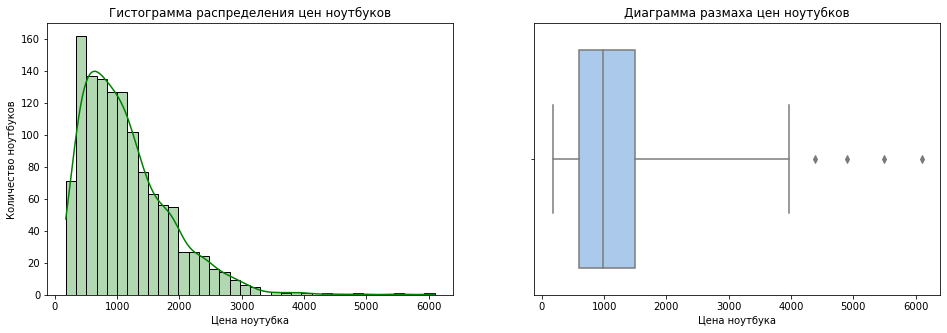

In [44]:
fig = plt.figure(figsize=(16, 5))
axes = fig.subplots(1 ,2)
sns.histplot(y, kde=True, color='green', alpha=0.3, ax=axes[0])
axes[0].title.set_text(f"Гистограмма распределения цен ноутбуков")
axes[0].set_xlabel('Цена ноутубка')
axes[0].set_ylabel('Количество ноутбуков')
axes[1].title.set_text('Диаграмма размаха цен ноутубков')
sns.boxplot(x=y, ax=axes[1], whis=3, palette='pastel');
axes[1].set_xlabel('Цена ноутбука')
plt.show();

Наблюдаем нессиметричное распределение с тяжёлым правым хвостом, то есть явным смещением цен в сторону низких значений. Большая часть ноутбуков расположена в низком и среднем ценовых сегментах, медианное значение около 1000 евро. Наличие ноутбуков с ценами выше 4000 евро - единичные случаи. Однако нет оснований считать экстремальные значения ошибками, поэтому удалять найденные выбросы не будем.

<a id="12"></a>
## Распределения признаков $X$ и их связь с ценой $y$ 

В первую очередь посмотрим на распределения каждого из признаков в отдельности с помощью гистограмм и диаграмм размаха (для числовых признаков). Также визуализируем с помощью столбчатых и точечных диаграмм зависимость целевой переменной $y$ от каждого из признаков $X$.

<u>Цель построения гистограмм и диаграмм размаха</u> - получить представление о том, как распределены значения в каждом признаке, найти особенности этих распределений, а также обнаружить экстремальные значения, выбивающиеся из общей тенденции - выбросы. Если признак имеет слишком много уникальных значений, будем показывать только самые популярные варианты. 

<u>Цель построения диаграмм</u> - наглядное изображение распределения стоимостей ноутбуков в зависимости от того или иного значения признака с целью оценки важности и степени влияния признаков на целевую переменную.

In [45]:
def show_marks(ax, percent=False, vert=False):
    if vert:
        ax.set_xlim(0, ax.get_xlim()[1] * 1.1)
    else:
        ax.set_ylim(0, ax.get_ylim()[1] * 1.1)
        
    for i, bar in enumerate(ax.patches):
        if vert:
            h = bar.get_width()
            ax.text(h+ax.get_xlim()[1]*0.055, i, f'{round(h * (100 / X.shape[0] if percent else 1), 2)}' + ('%' if percent else ''), 
                    ha='center', va='center')
        else:
            h = bar.get_height()
            ax.text(i, h+ax.get_ylim()[1]*0.04, f'{round(h * (100 / X.shape[0] if percent else 1), 2)}' + ('%' if percent else ''), 
                    ha='center', va='center')

def my_countplot(feature, figsize, title, xlabel, ylabel, vert=False, sort=False):
    fig = plt.figure(figsize=figsize)
    order = (X[feature].value_counts().index if sort else None)
    plot = sns.countplot(y=X[feature] if vert else None, x=None if vert else X[feature], order=order, palette='magma_r')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    show_marks(plot.axes, True, vert)
    plt.show();
    
def my_barplot(feature_name, x_label, title, figsiz, hue_feature=None, legend_title=None):
    plt.figure(figsize=figsiz)
    if hue_feature:
        my_plot = sns.barplot(x=X[feature_name], y=y, saturation=1, hue=X[hue_feature])
        my_plot.legend(title=legend_title);
    else:
        order = data.groupby(feature_name)[target_name].mean().sort_values(ascending=False).index
        sns.barplot(x=X[feature_name], y=y, order=order, palette='RdYlGn', saturation=1)
    plt.title(f'Зависимость цен ноутбуков от {title} (доверительная вероятность = 0.95)')
    plt.ylabel('Средняя цена ноутбука');
    plt.xlabel(x_label)

<a id="12_1"></a>
### Масса 

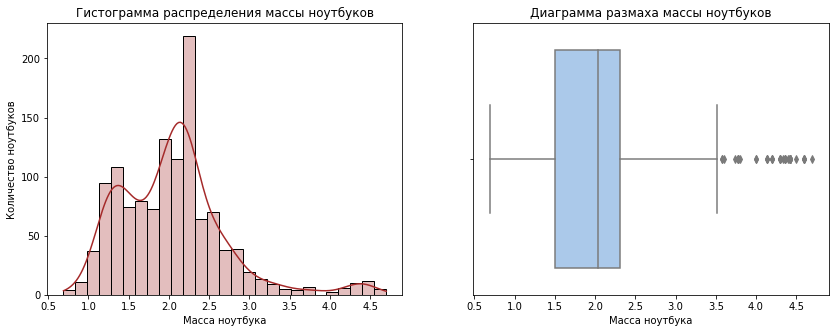

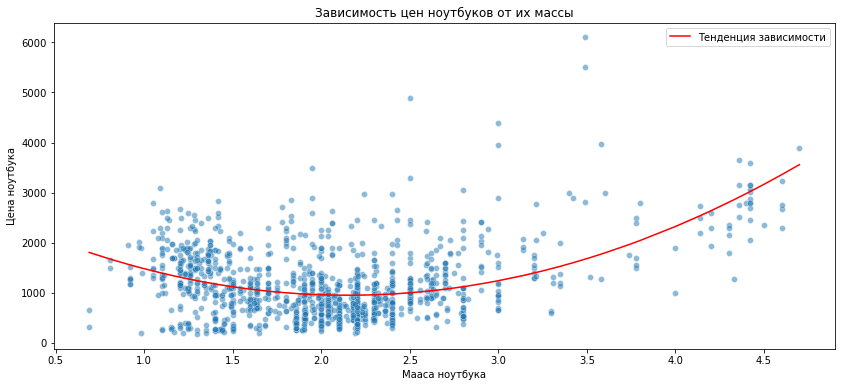

In [46]:
fig = plt.figure(figsize=(14, 5))
axes = fig.subplots(1, 2)
sns.histplot(X['Weight_kg'], kde=True, color='brown', alpha=0.3, ax=axes[0])
axes[0].title.set_text(f"Гистограмма распределения массы ноутбуков")
axes[0].set_xlabel('Масса ноутбука')
axes[0].set_ylabel('Количество ноутбуков')
sns.boxplot(X['Weight_kg'], palette='pastel', ax=axes[1])
axes[1].title.set_text(f"Диаграмма размаха массы ноутбуков")
axes[1].set_xlabel('Масса ноутбука')
plt.show();

poly_x = PolynomialFeatures(2).fit_transform(pd.DataFrame(X['Weight_kg']))
y_pred = LinearRegression().fit(poly_x, y.array.to_numpy()).predict(poly_x)
plt.figure(figsize=(14, 6))
sns.scatterplot(x=X['Weight_kg'], y=y, alpha=0.5)
sns.lineplot(x=X['Weight_kg'], y=y_pred, color='red', label='Тенденция зависимости')
plt.title('Зависимость цен ноутбуков от их массы')
plt.xlabel('Мааса ноутбука')
plt.ylabel('Цена ноутбука')
plt.legend();

Более половины ноутбуков имеют массу от 1.5 до 2.5 кг, однако данные распределены неравномерно. Видим также значительное количество экстремальных значений (масса > 3.5 кг). Наблюдаем нелинейную зависимость в данных: самые дешёвые ноутбуки имеют массу около средней, а очень тяжёлые ноутбуки, как и очень лёгкие ноутбуки имеют в среднем более высоку стоимость.

<a id="12_2"></a>
### Модели

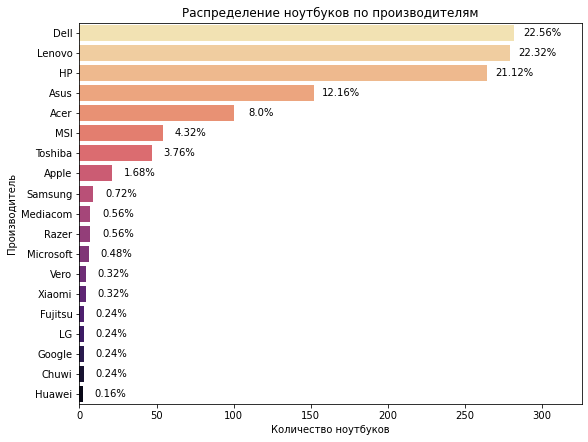

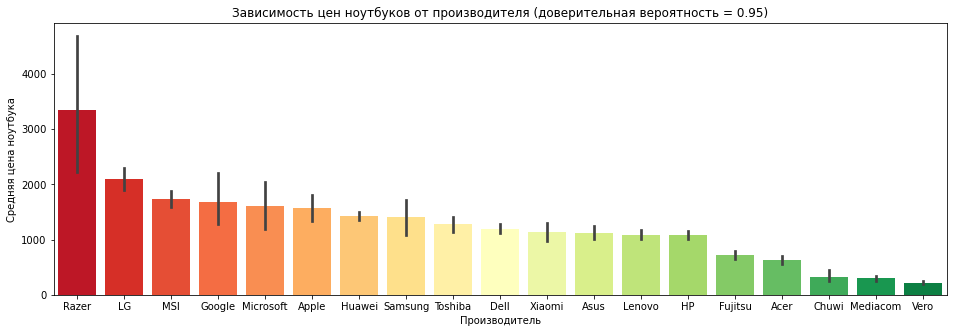

In [47]:
my_countplot('Company', (9, 7), 'Распределение ноутбуков по производителям', 
                                   'Количество ноутбуков', 'Производитель', vert=True, sort=True)
my_barplot('Company', 'Производитель', 'производителя', (16, 5))

Среди производителей ноутбуков есть явные лидеры. Больше всего ноутбуков предлагают следующие фирмы:
- Dell
- Lenovo
- HP
- Asus

Посмотрим подробнее, какие модели перечисленных выше производиделей встречаются чаще всего.

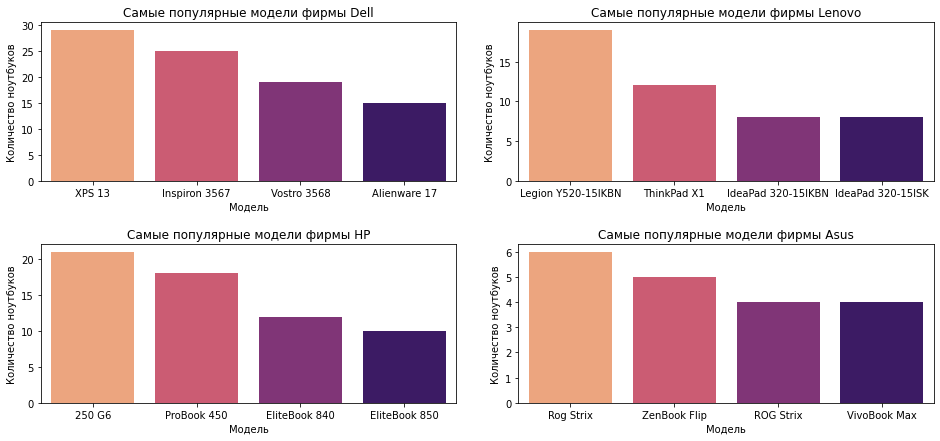

In [48]:
top_companies = X['Company'].value_counts().head(4).index.values
grouped_X = X.groupby('Company')['Product'].value_counts()
fig = plt.figure(figsize=(16, 7))
axes = fig.subplots(2, 2)
for i, company in enumerate(top_companies):
    ax=axes[i // 2][i % 2]
    top_products = grouped_X[company].head(4)
    sns.barplot(top_products.index, top_products.values, ax=ax, palette='magma_r')
    ax.title.set_text(f'Самые популярные модели фирмы {company}')
    ax.set_xlabel('Модель')
    ax.set_ylabel('Количество ноутбуков')
plt.subplots_adjust(wspace=0.15, hspace=0.4)
plt.show()

<a id="12_3"></a>
### Дисплеи 

Визуализируем параметры ноутбуков, относящиеся к дисплею. 

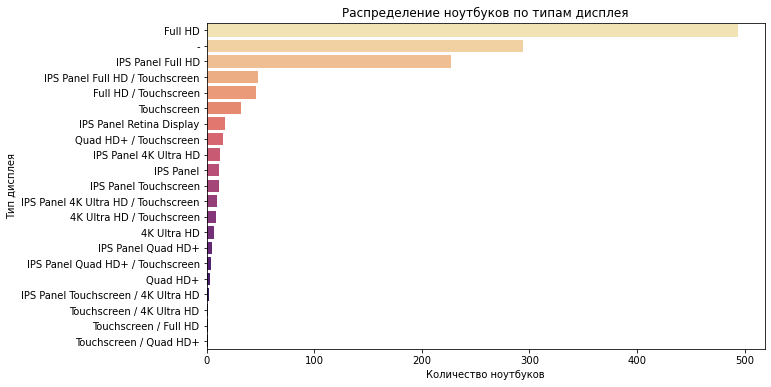

In [49]:
top_screen_types = X[X['ScreenType'].isin(X['ScreenType'].value_counts().index.values)]['ScreenType']
plt.figure(figsize=(10, 6))
sns.countplot(y=top_screen_types, order=top_screen_types.value_counts().index, palette='magma_r')
plt.title('Распределение ноутбуков по типам дисплея')
plt.xlabel('Количество ноутбуков')
plt.ylabel('Тип дисплея')
plt.show();

Наблюдаем 2 важых факта. Во-первых, не для всех ноутбуков представлена информация о типе дисплея. Во-вторых, даже в тех случаях, когда информация представлена, она не везде полная. Из-за этого нельзя делать выводы, например, о том, что ноутбуков с Full HD экраном около 500, так как в некоторых других вариантах с несколькими характеристиками тоже присутствует разрешение Full HD, а в некоторых вовсе отсутствует какая-либо информация об этом параметре.

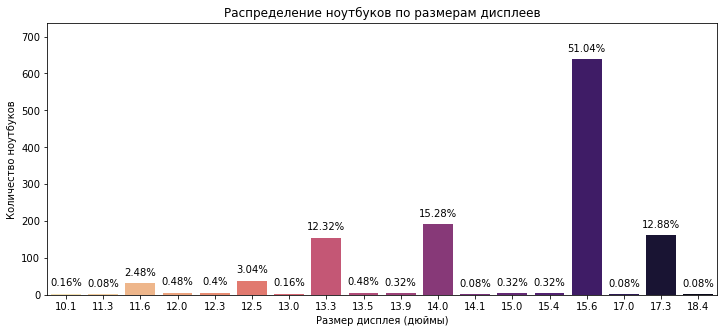

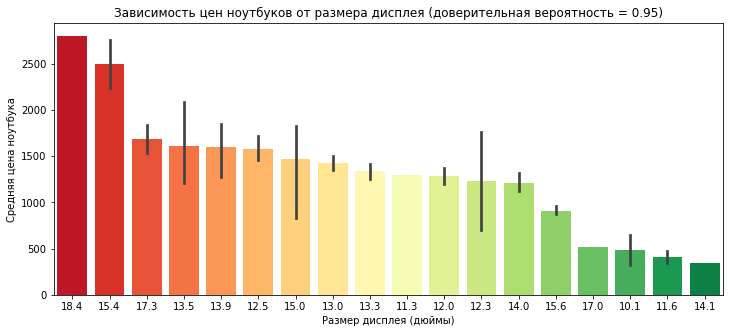

In [50]:
my_countplot('Inches', (12, 5), 'Распределение ноутбуков по размерам дисплеев', 
                                   'Размер дисплея (дюймы)', 'Количество ноутбуков')
my_barplot('Inches', 'Размер дисплея (дюймы)', 'размера дисплея', (12, 5))

Интересная закономерность: несмотря на кажущееся большим разнообразие размеров дисплеев (целых 18 вариантов), у большинства ноутбуков дисплей равен всего одному из 4 вариантов (`15.6`, `14.0`, `17.3`, `13.3`). При этом около половины всех ноутбуков имеет дисплей `15.6` дюймов. Видим также, что почти все ноутбуки с популярными размерами дисплея имеют невысокую среднюю стоимость. Линейная связь между размером дисплея и стоимостью ноутбука не наблюдается.

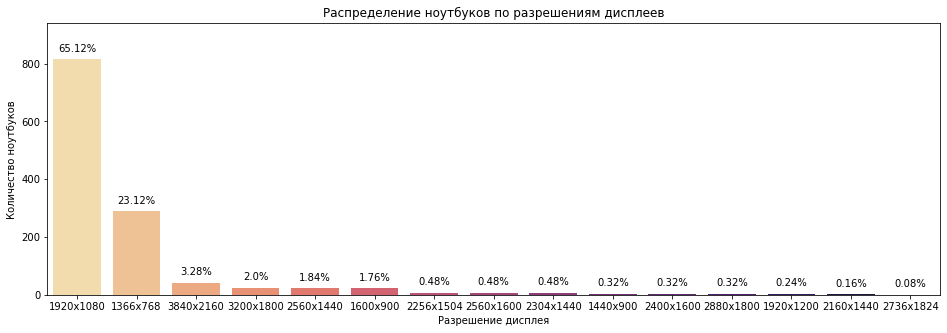

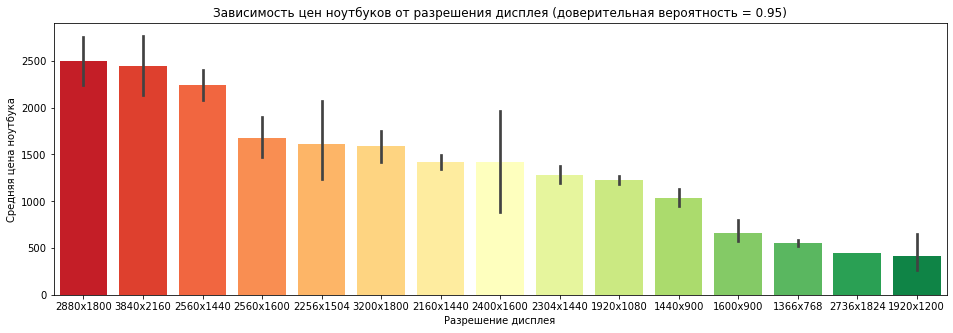

In [51]:
my_countplot('ScreenRes', (16, 5), 'Распределение ноутбуков по разрешениям дисплеев', 
                                   'Разрешение дисплея', 'Количество ноутбуков', sort=True)
my_barplot('ScreenRes', 'Разрешение дисплея', 'разрешения дисплея', (16, 5))

С разрешением дисплеев ситуация аналогичная. Не все разрешения одинаково распространены. Из 15 существующих вариантов, основную долю занимают разрешения `1920x1080` и `1366x768`. При этом несмотря на то, что ноутбуки с разрешением `1920x1080` в среднем дороже ноутбуков с разрешением `1366x768`, они встречаются чаще. Можно заметить нестрогую линейную зависимость между разрешением дисплея и стоимостю ноутбука: большое разрешение чаще приводит к более высокой средней цене ноутбука.

<a id="12_4"></a>
### Оперативная память

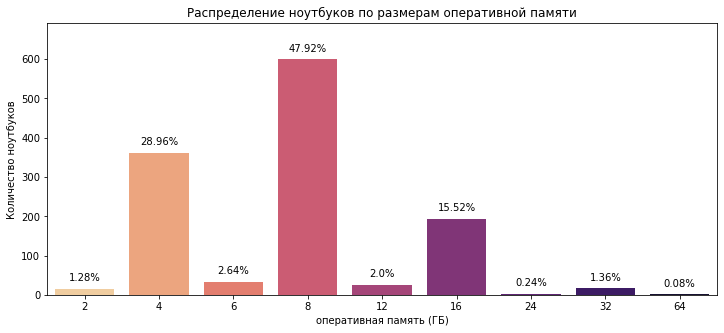

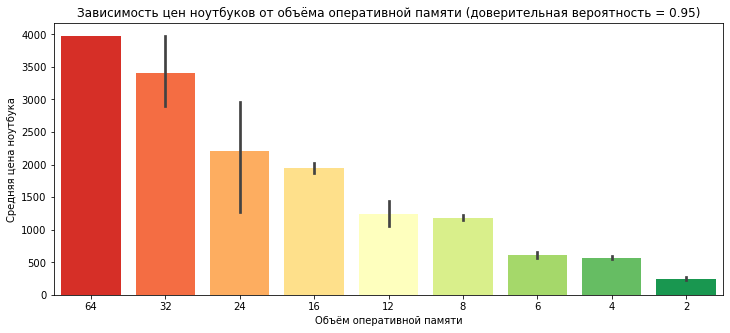

In [52]:
my_countplot('Ram_GB', (12, 5), 'Распределение ноутбуков по размерам оперативной памяти', 
                                    'оперативная память (ГБ)', 'Количество ноутбуков')
my_barplot('Ram_GB', 'Объём оперативной памяти', 'объёма оперативной памяти', (12, 5))

Из данных графиков видим, что оперативная память выше 16 ГБ практически не встречается, что может быть связано с их высокой стоимостью. Маленькая память 2ГБ также очень редкая несмотря на то, что ноутбуки с такой памятью в среднем крайне дешёвые. 

<u>Второй график приводит к очень важному наблюдению:</u> чем больше оперативной памяти у ноутбука, тем в среднем дороже он стоит. Из общей тенденции вероятно выбивается значение 24 ГБ, что можно заметить по широкому доверительному интервалу средней стоимости. И всё же в отличие от всех предыдущих закономерностей эта является наиболее выраженной. 

<a id="12_5"></a>
### Типы ноутбков и операционные системы

Ноутбуки бывают разных категорий. Тип ноутбука может оказывать влияние на итогоую стоимость, поэтому важно посмотреть, какие типы ноутбуков встречаются часто, а какие очень редко. Также некоторые типы ноутубков могу быть критичны к варивнтам вохможных операционных систем.

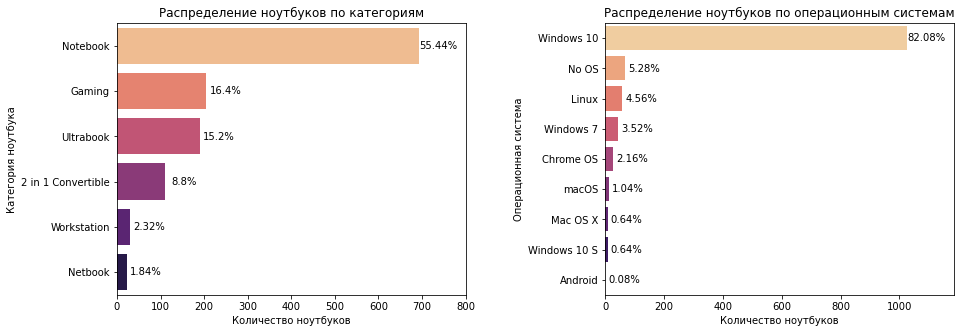

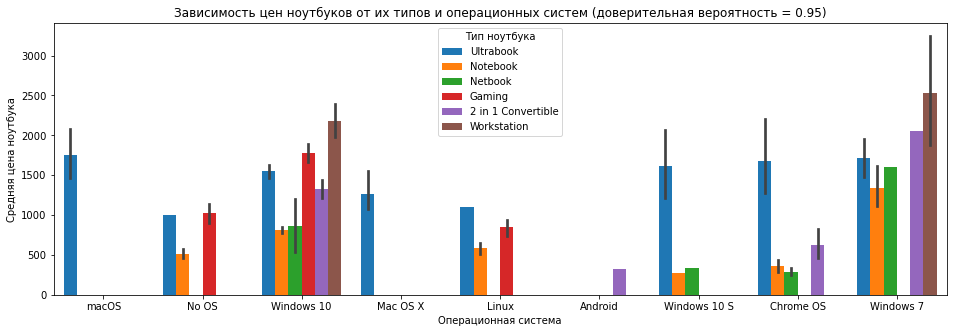

In [53]:
fig = plt.figure(figsize=(15, 5))
axes = fig.subplots(1, 2)
order1 = X['TypeName'].value_counts().index
sns.countplot(y=X['TypeName'], order=order1, palette='magma_r', ax=axes[0])
axes[0].title.set_text('Распределение ноутбуков по категориям')
axes[0].set_xlabel('Количество ноутбуков')
axes[0].set_ylabel('Категория ноутбука')
order2 = X['OpSys'].value_counts().index
show_marks(axes[0], percent=True, vert=True)
sns.countplot(y=X['OpSys'], order=order2, palette='magma_r', ax=axes[1])
axes[1].title.set_text('Распределение ноутбуков по операционным системам')
axes[1].set_xlabel('Количество ноутбуков')
axes[1].set_ylabel('Операционная система')
show_marks(axes[1], percent=True, vert=True)
plt.subplots_adjust(wspace=0.4)
plt.show();

my_barplot('OpSys', 'Операционная система', 'их типов и операционных систем', (16, 5), 'TypeName', 'Тип ноутбука')

Более половины всех ноутбуков имеют тип `Notebook`. Наименее популярная категория - `Netbook`. Практически весь датасет содержит сведения о ноутбуках с предустановленной операционной системой `Windows 10`. При дальнейшем анализе следует учитывать данный факт, так как все выводы, которые будут сделаны, будут относиться в первую очередь именно к моделям ноутубуков с этой операционной системой. Все остальные операционные системы составляют очень малую долю и так небольшого набора данных, поэтому их отдельный анализ является затруднительным.

<a id="12_6"></a>
### Процессоры

Рассмотрим сначала характеристики центрального процессора. Так как поделей процессоров в нашем наборе данных очень много, отобразим только самые популярные варианты.

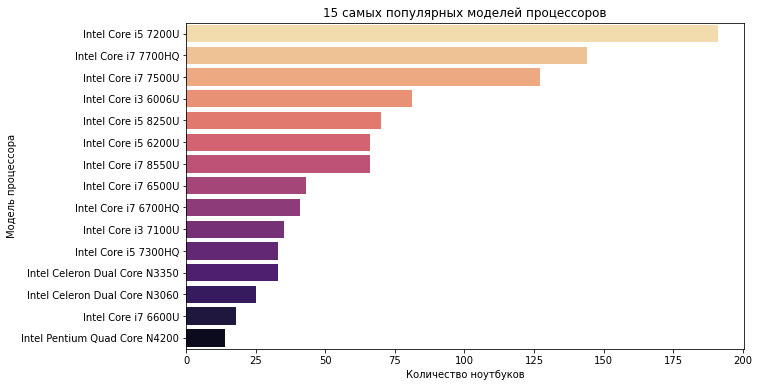

In [54]:
top_n = 15
top_screen_types = X[X['Cpu_type'].isin(X['Cpu_type'].value_counts().head(top_n).index.values)]['Cpu_type']
plt.figure(figsize=(10, 6))
sns.countplot(y=top_screen_types, order=top_screen_types.value_counts().index, palette='magma_r')
plt.title(f'{top_n} самых популярных моделей процессоров')
plt.xlabel('Количество ноутбуков')
plt.ylabel('Модель процессора')
plt.show();

Теперь посмотрим на частоты процессоров.

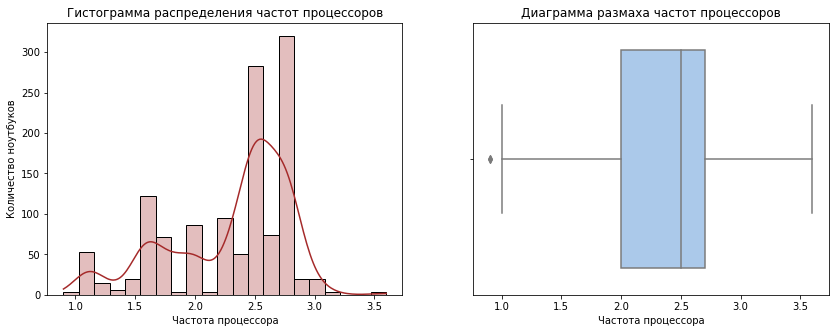

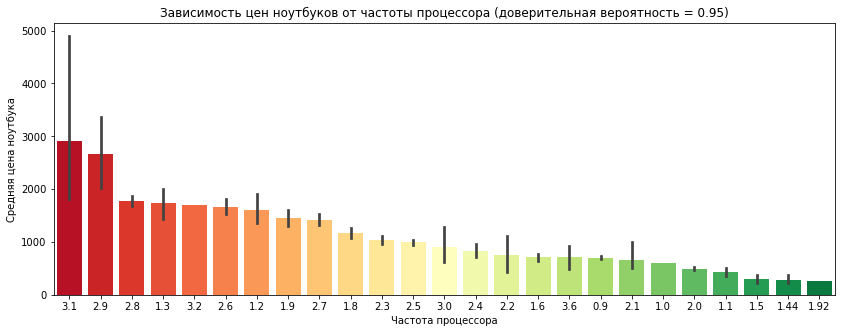

In [55]:
fig = plt.figure(figsize=(14, 5))
axes = fig.subplots(1, 2)
sns.histplot(X['Cpu_GHz'], kde=True, color='brown', alpha=0.3, ax=axes[0])
axes[0].title.set_text(f"Гистограмма распределения частот процессоров")
axes[0].set_xlabel('Частота процессора')
axes[0].set_ylabel('Количество ноутбуков')
sns.boxplot(X['Cpu_GHz'], palette='pastel', ax=axes[1])
axes[1].title.set_text(f"Диаграмма размаха частот процессоров")
axes[1].set_xlabel('Частота процессора')
plt.show();

my_barplot('Cpu_GHz', 'Частота процессора', 'частоты процессора', (14, 5))

Наблюдаем относительно большое разнообрание частот, однако всё же есть значения, которые встречаются карйне редко. Причём редкиими являются не только самые высокие и низкие значения. Также из диаграммы размаха можем сделать вывод, что значительные выбросы отсутствуют. Интересен также факт, что высокая частота процессора не всегда приводит к более высокой средней стоимости ноутбука.

Перейдём к графическим процессорам.

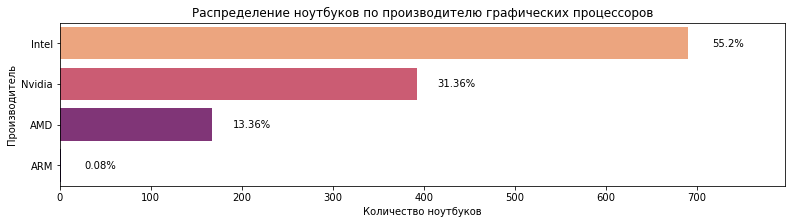

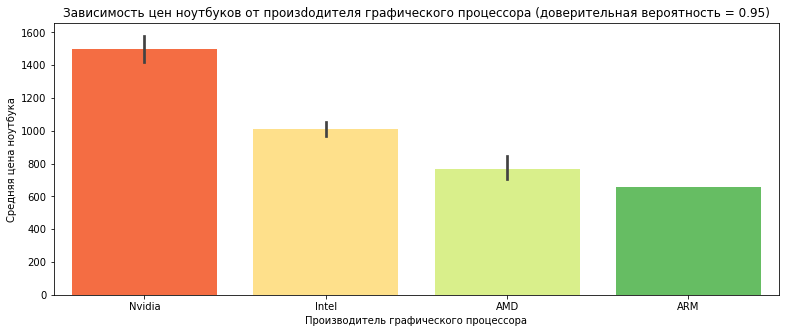

In [56]:
my_countplot('Gpu_producer', (13, 3), 'Распределение ноутбуков по производителю графических процессоров', 
                                    'Количество ноутбуков', 'Производитель', vert=True, sort=True)
my_barplot('Gpu_producer', 'Производитель графического процессора', 'произdодителя графического процессора', (13, 5))

Можно заметить, что значение `ARM` практически не встречается. Посомтрим, сколько раз оно встречается в датасете.

In [57]:
print(f"Значение ARM встречается в датасете {X['Gpu_producer'].value_counts().sort_values()['ARM']} раз.")

Значение ARM встречается в датасете 1 раз.


Таким образом, можем отнести данное значение к выбросам, так как на его основе мы не сможем сделать никаких статистически значимых выводов. Средняя стоимость ноутбуков с `ARM`, показанная на диаграмме вычислена на основе всего 1 значения, поэтому нельзя быть уверенными в том, что граифческие процессоры `ARM` являются признаком низкой стоимости ноутбуков. Однако удалять запись о ноутбуке с этим графическим процессором всё же не будем, так как остальные характеристики ноутбука не относятся к выбросам и представляют интерес для анализа.

Рассмотрим самые популярные модели графических процессоров каждого из производителей.

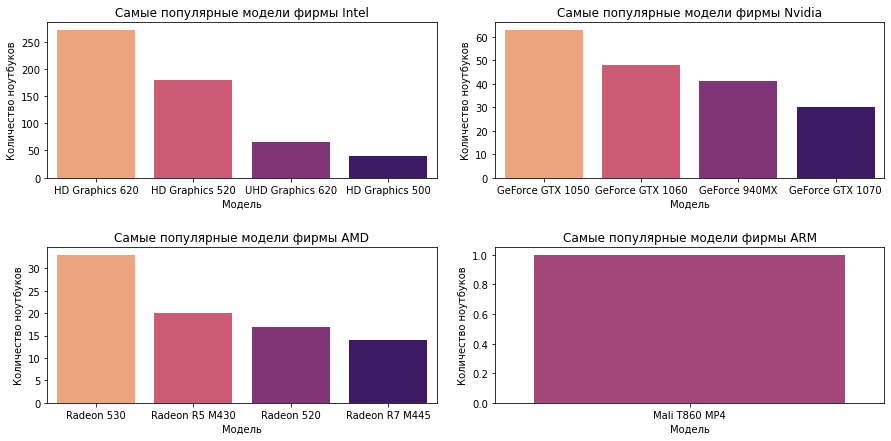

In [58]:
top_companies = X['Gpu_producer'].value_counts().head(4).index.values
grouped_X = X.groupby('Gpu_producer')['Gpu_model'].value_counts()
fig = plt.figure(figsize=(15, 7))
axes = fig.subplots(2, 2)
for i, company in enumerate(top_companies):
    ax=axes[i // 2][i % 2]
    top_products = grouped_X[company].head(4)
    sns.barplot(top_products.index, top_products.values, ax=ax, palette='magma_r')
    ax.title.set_text(f'Самые популярные модели фирмы {company}')
    ax.set_xlabel('Модель')
    ax.set_ylabel('Количество ноутбуков')
plt.subplots_adjust(wspace=0.15, hspace=0.45)
plt.show();

Для моделей `ARM` получили предсказуемый результат. Для остальных производителей видим наличие явно лидирующей модели даже среди 4 самых популярных моделей.

<a id="12_7"></a>
### Жёсткие диски

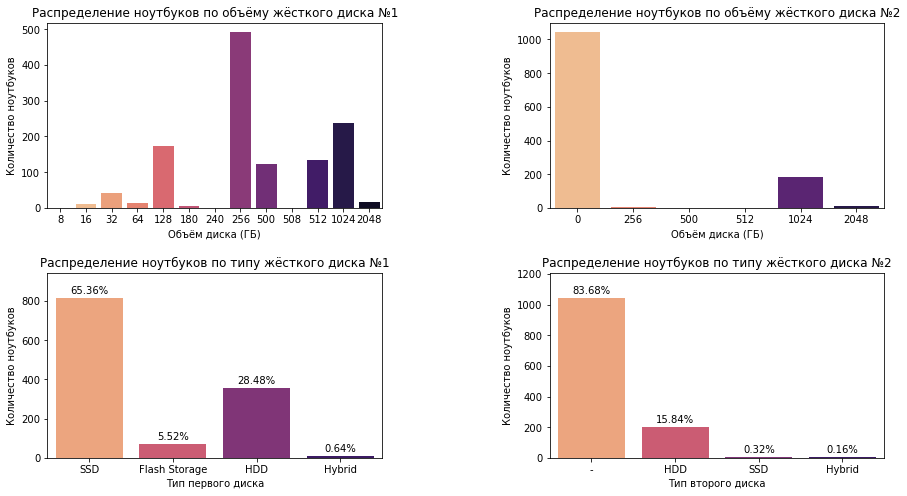

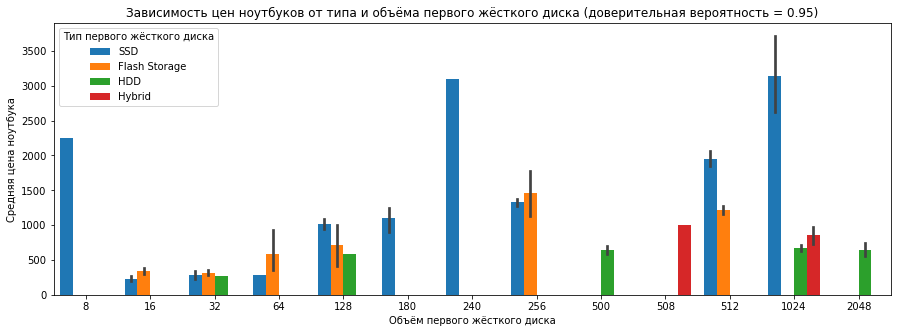

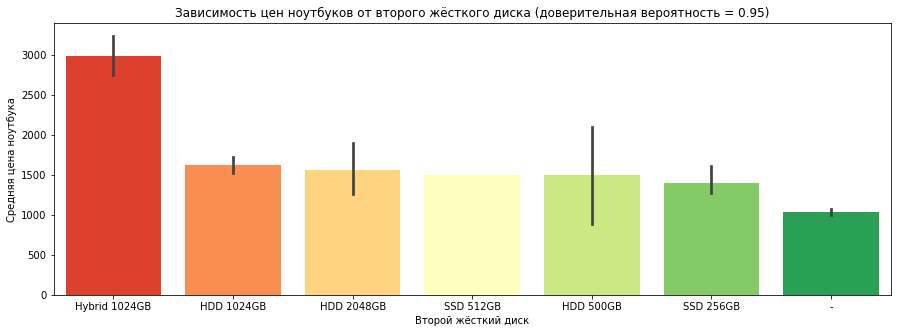

In [59]:
fig = plt.figure(figsize=(15, 8))
ax1, ax2 = fig.subplots(2, 2)
sns.countplot(x = X['Memory1_GB'], ax=ax1[0], palette='magma_r')
ax1[0].title.set_text('Распределение ноутбуков по объёму жёсткого диска №1')
ax1[0].set_xlabel('Объём диска (ГБ)')
ax1[0].set_ylabel('Количество ноутбуков')
sns.countplot(x = X['Memory2_GB'], ax=ax1[1], palette='magma_r')
ax1[1].title.set_text('Распределение ноутбуков по объёму жёсткого диска №2')
ax1[1].set_xlabel('Объём диска (ГБ)')
ax1[1].set_ylabel('Количество ноутбуков')
my_plot = sns.countplot(x = X['Memory1_type'], ax=ax2[0], palette='magma_r')
ax2[0].title.set_text('Распределение ноутбуков по типу жёсткого диска №1')
ax2[0].set_xlabel('Тип первого диска')
ax2[0].set_ylabel('Количество ноутбуков')
show_marks(ax2[0], percent=True)
sns.countplot(x = X['Memory2_type'], ax=ax2[1], palette='magma_r')
ax2[1].title.set_text('Распределение ноутбуков по типу жёсткого диска №2')
ax2[1].set_xlabel('Тип второго диска')
ax2[1].set_ylabel('Количество ноутбуков')
show_marks(ax2[1], percent=True)
plt.subplots_adjust(wspace=0.5, hspace=0.35)
plt.show();

my_barplot('Memory1_GB', 'Объём первого жёсткого диска', 'типа и объёма первого жёсткого диска', (15, 5), 
           'Memory1_type', 'Тип первого жёсткого диска')
my_barplot('Memory2', 'Второй жёсткий диск', 'второго жёсткого диска', (15, 5))

В отличие от многих других параметров, где самые высокие значения встречались крайне редко, здесь видим, что жёсткие диски с больших объёмом 1 ТБ находятся на 2 месте по популярности. Ноутбуки с диском SSD оказываются как правило дороже ноутбуков с диском HDD. При этом также видим явную закономерность: в качестве первого жёсткого диска чаще всего выступает SSD, а вторым диском (при его наличии) в абсолютном большинстве случае всегда является HDD и его размер как правило не меньше 1 ТБ. Однако сам второй жёсткий диск встречается довольно редко.

Анализ второго жёсткого диска также показал, что многие типы и размеры дисков не оказывают серьёзного влияни на среднюю стоимость ноутбуков. Но важно другое: мы видим ярко выраженую зависимость стоимости ноутбука от самого факта наличия или отсутствия второго жёсткого диска. Поэтому делаем вывод о том, что второй жёсткий диск является довольно важным признаком для оценивания стоимости ноутбуков.

<a id="13"></a>
# 4) Информация о корреляции признаков

Выше были рассмотрены зависимости целевой переменной $y$ от признаков $X$. Посмотрим теперь, как признаки $X$ связаны между собой. Вычислим для этого матрицу корреляций для всех числовых признаков $X$. Полученные коэффициенты взаимной корреляции будут означать, насколько сильно два параметра статистически взаимосвязаны. Это поможет выявить возможные зависимости в данных. Стремление коэффициента корреляции к нулю будет означать, что параметры не связаны между собой. Значения, близкие к 1, будут означать наличие сильной связи между параметрами. Коэффициент, равный 1, означает линейную зависимость одного параметра от другого. Отрицательные же значения коэффициентов являются признаком обратной зависимости, то есть с увеличением значений первого параметра значения второго уменьшаются.

In [60]:
X.corr()

,laptop_ID,Inches,Ram_GB,Weight_kg,ScreenWidth,ScreenHeight,Cpu_GHz,Memory1_GB,Memory2_GB
laptop_ID,1.000000,-0.075667,-0.003793,-0.000685,-0.021362,-0.033813,0.120027,-0.014624,-0.005076
Inches,-0.075667,1.000000,0.239176,0.824471,-0.067623,-0.091069,0.305451,0.264628,0.386861
Ram_GB,-0.003793,0.239176,1.000000,0.390605,0.421612,0.413198,0.373260,0.013849,0.390498
Weight_kg,-0.000685,0.824471,0.390605,1.000000,-0.025296,-0.046131,0.320855,0.172982,0.482905
ScreenWidth,-0.021362,-0.067623,0.421612,-0.025296,1.000000,0.994060,0.183702,-0.075355,0.154498
ScreenHeight,-0.033813,-0.091069,0.413198,-0.046131,0.994060,1.000000,0.170085,-0.081994,0.143385
Cpu_GHz,0.120027,0.305451,0.373260,0.320855,0.183702,0.170085,1.000000,0.053495,0.239737
Memory1_GB,-0.014624,0.264628,0.013849,0.172982,-0.075355,-0.081994,0.053495,1.000000,-0.245965
Memory2_GB,-0.005076,0.386861,0.390498,0.482905,0.154498,0.143385,0.239737,-0.245965,1.000000


Для удобства анализа полученной таблицы построим по ней тепловую карту.

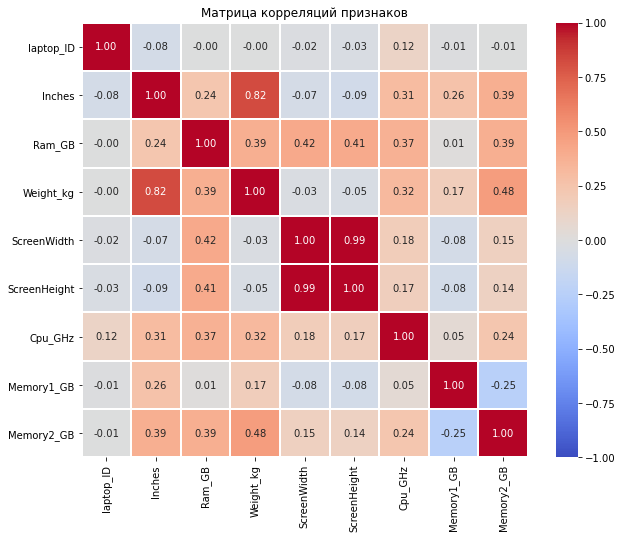

In [61]:
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm', fmt='.2f', linewidth=1)
plt.title('Матрица корреляций признаков');

Выводы:
- размер дисплея и масса ноутбука имеют ярко выраженную статистическую зависимость;
- разрешение экрана по вертикали практически линейно зависит от разрешения экрана по горизонтали, что говорит об избыточности данных при хранении обоих параметров;
- существует довольно высокая корреляция между массой ноутбука и объёмом второго жёсткого диска (можно объяснить тем, что почти все значения объёма жёсткого дика равны либо 0 либо 1024 ГБ, поэтому была найдена зависимость массы не от объёма диска, а по сути от факта отсутствия либо наличия диска);
- есть некоторая прямая связь между объёмом оперативной памяти и разрешением экрана;
- объёмы оперативной памяти и первого жёсткого диска не коррелируют, то есть между ними отсутствует какая-либо линейная связь;
- частота процессора коррелирует с объёмом оперативной памяти.

В целом видим, что большая часть коэффициентов положительна. Это логично, так как более высокие значения одной из характеристик чаще указывают на то, что остальные характеристи тоже будут не слишком низкими.

Теперь найдём коэффициенты корреляции между признаками $X$ и целевой переменной $y$, чтобы определить влияние признаков на стоимость ноутбуков и сравнить результаты с закономерностями, выявленными ранее при визуализации распределений признаков $X$ и их связей с целевой переменной $y$.

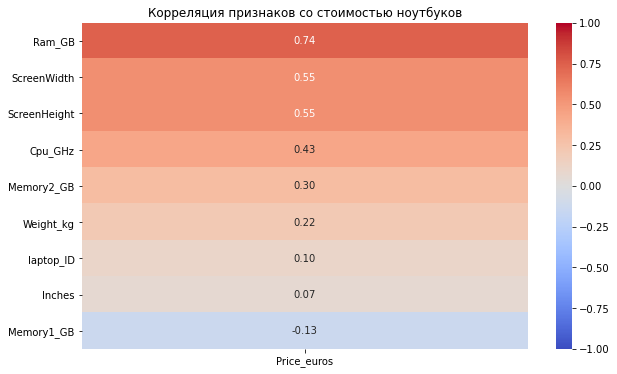

In [62]:
plt.figure(figsize=(10, 6))
sns.heatmap(pd.DataFrame(data.corr()[target_name].sort_values(ascending=False)[1:]), vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Корреляция признаков со стоимостью ноутбуков');

Полученный столбец характеризует значимость признаков. То есть наибольший вклад в значение стоимости ноутбука вносит размер оперативной памяти, что и было обнаружено ранее, а наименьший вклад у размера экрана. Практически все признаки имеют положительную корреляцию со стоимостью ноутбука, что говорит о наличии прямой линейной зависимости. Единственный отрицательный коэффициент корреляции у объёма первого жёсткого диска. Это можно объяснить тем, что диски HDD, которые в среднем дешевле SSD, имеют в среднем больший объём памяти и поэтому наблюдается слабая обратная зависимость: чем больше объём диска, тем дешевле ноутбук. Однако коэффицент корреляции слишком маленький, чтобы делать из этого серьёзные выводы. Так, например, между стоимостью ноутбука и его уникальным идентификатором тоже существует слабая корреляция, хотя на самом деле причинно-следственная связь между этими парамерами явно отсутствует.